#### Data Understanding

In [1]:
# Import the dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA



In [2]:
# Load and read the dataset

df = pd.read_csv("./Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
#pd.set_option("display.maximum_columns, None")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Display the variables
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape

(1470, 35)

In [5]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [6]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [7]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

In [8]:
# Check for null values in the dataframe
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### Key Insight
###### There is no null values in the dataframe

In [9]:
df['Attrition'].unique

<bound method Series.unique of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object>

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

###### Key Insight
###### The target variable is imbalanced

In [11]:
df['BusinessTravel'].unique

<bound method Series.unique of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object>

In [12]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [13]:
df['DailyRate'].unique

<bound method Series.unique of 0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64>

In [14]:
df['DailyRate'].value_counts()

DailyRate
691     6
1082    5
329     5
530     5
408     5
       ..
1382    1
161     1
801     1
642     1
1154    1
Name: count, Length: 886, dtype: int64

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
df['Department'].unique

<bound method Series.unique of 0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object>

In [17]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [18]:
df['DistanceFromHome'].unique

<bound method Series.unique of 0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64>

In [19]:
df['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
15     26
18     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

In [20]:
df['Education'].unique

<bound method Series.unique of 0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64>

In [21]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [22]:
df['EducationField'].unique

<bound method Series.unique of 0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470, dtype: object>

In [23]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [24]:
df['EmployeeCount'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64>

In [25]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

###### Key insight
###### EmployeeCount is constant

In [26]:
df['EmployeeNumber'].unique

<bound method Series.unique of 0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64>

In [27]:
df['EmployeeNumber'].value_counts()

EmployeeNumber
2068    1
1       1
2       1
4       1
5       1
       ..
23      1
22      1
21      1
20      1
19      1
Name: count, Length: 1470, dtype: int64

In [28]:
df['EnvironmentSatisfaction'].unique

<bound method Series.unique of 0       2
1       3
2       4
3       4
4       1
       ..
1465    3
1466    4
1467    2
1468    4
1469    2
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64>

In [29]:
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [30]:
df['Gender'].unique

<bound method Series.unique of 0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object>

In [31]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [32]:
df['HourlyRate'].unique

<bound method Series.unique of 0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64>

In [33]:
df['HourlyRate'].value_counts()

HourlyRate
66    29
84    28
42    28
98    28
48    28
      ..
89    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64

In [34]:
df['JobInvolvement'].unique

<bound method Series.unique of 0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64>

In [35]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [36]:
df['JobLevel'].unique

<bound method Series.unique of 0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: int64>

In [37]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [38]:
df['JobRole'].unique

<bound method Series.unique of 0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object>

In [39]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [40]:
df['JobSatisfaction'].unique

<bound method Series.unique of 0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64>

In [41]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [42]:
df['MaritalStatus'].unique

<bound method Series.unique of 0        Single
1       Married
2        Single
3       Married
4       Married
         ...   
1465    Married
1466    Married
1467    Married
1468    Married
1469    Married
Name: MaritalStatus, Length: 1470, dtype: object>

In [43]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [44]:
df['MonthlyIncome'].unique

<bound method Series.unique of 0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64>

In [45]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
2342     4
2610     3
2559     3
2451     3
6142     3
        ..
13570    1
6712     1
5406     1
8938     1
5130     1
Name: count, Length: 1349, dtype: int64

In [46]:
df['MonthlyRate'].unique

<bound method Series.unique of 0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64>

In [47]:
df['MonthlyRate'].value_counts()

MonthlyRate
9150     3
4223     3
17001    2
6069     2
6670     2
        ..
12227    1
11288    1
16642    1
5982     1
14255    1
Name: count, Length: 1427, dtype: int64

In [48]:
df['NumCompaniesWorked'].unique

<bound method Series.unique of 0       8
1       1
2       6
3       1
4       9
       ..
1465    4
1466    4
1467    1
1468    2
1469    2
Name: NumCompaniesWorked, Length: 1470, dtype: int64>

In [49]:
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [50]:
df['Over18'].unique

<bound method Series.unique of 0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object>

In [51]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

###### Key insight
###### Y is constant for over18 variable i.e all the employees are above 18 years of age

In [52]:
df['OverTime'].unique

<bound method Series.unique of 0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object>

In [53]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [54]:
df['PercentSalaryHike'].unique

<bound method Series.unique of 0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64>

In [55]:
df['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [56]:
df['PerformanceRating'].unique

<bound method Series.unique of 0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64>

In [57]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [58]:
df['RelationshipSatisfaction'].unique

<bound method Series.unique of 0       1
1       4
2       2
3       3
4       4
       ..
1465    3
1466    1
1467    2
1468    4
1469    1
Name: RelationshipSatisfaction, Length: 1470, dtype: int64>

In [59]:
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [60]:
df['StandardHours'].unique

<bound method Series.unique of 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64>

In [61]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

###### Key insight
###### StandardHours is constant for all the employees

In [62]:
df['StockOptionLevel'].unique

<bound method Series.unique of 0       0
1       1
2       0
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    0
1469    0
Name: StockOptionLevel, Length: 1470, dtype: int64>

In [63]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [64]:
df['TotalWorkingYears'].unique

<bound method Series.unique of 0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64>

In [65]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

In [66]:
df['TrainingTimesLastYear'].unique

<bound method Series.unique of 0       0
1       3
2       3
3       3
4       3
       ..
1465    3
1466    5
1467    0
1468    3
1469    3
Name: TrainingTimesLastYear, Length: 1470, dtype: int64>

In [67]:
df['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [68]:
df['WorkLifeBalance'].unique

<bound method Series.unique of 0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64>

In [69]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [70]:
df['YearsAtCompany'].unique

<bound method Series.unique of 0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1470, dtype: int64>

In [71]:
df['YearsAtCompany'].value_counts()

YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
21     14
12     14
18     13
16     12
19     11
17      9
24      6
33      5
26      4
25      4
31      3
32      3
27      2
29      2
36      2
23      2
37      1
40      1
34      1
30      1
Name: count, dtype: int64

In [72]:
df['YearsInCurrentRole'].unique

<bound method Series.unique of 0       4
1       7
2       0
3       7
4       2
       ..
1465    2
1466    7
1467    2
1468    6
1469    3
Name: YearsInCurrentRole, Length: 1470, dtype: int64>

In [73]:
df['YearsInCurrentRole'].value_counts()

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [74]:
df['YearsSinceLastPromotion'].unique

<bound method Series.unique of 0       0
1       1
2       0
3       3
4       2
       ..
1465    0
1466    1
1467    0
1468    0
1469    1
Name: YearsSinceLastPromotion, Length: 1470, dtype: int64>

In [75]:
df['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

In [76]:
df['YearsWithCurrManager'].unique

<bound method Series.unique of 0       5
1       7
2       0
3       0
4       2
       ..
1465    3
1466    7
1467    3
1468    8
1469    2
Name: YearsWithCurrManager, Length: 1470, dtype: int64>

In [77]:
df['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: count, dtype: int64

#### Check for duplicated rows in the dataframe

In [78]:
df.duplicated().sum()

np.int64(0)

##### Summary Statistics

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width',1000)
statistics = df.describe()
print(statistics)


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.923810   802.485714          9.192517     2.912925      

###### Key insights
###### Higher mean values in the employee features suggest a more concentrated distribution with less variability among the data points. However, "Employees' YearsSinceLastPromotion" exhibits a higher standard deviation, indicating a greater degree of variability. This increased dispersion from the mean could imply the presence of outliers.

#### Exploratory Data Analysis(EDA)

##### Checking for possible outliers

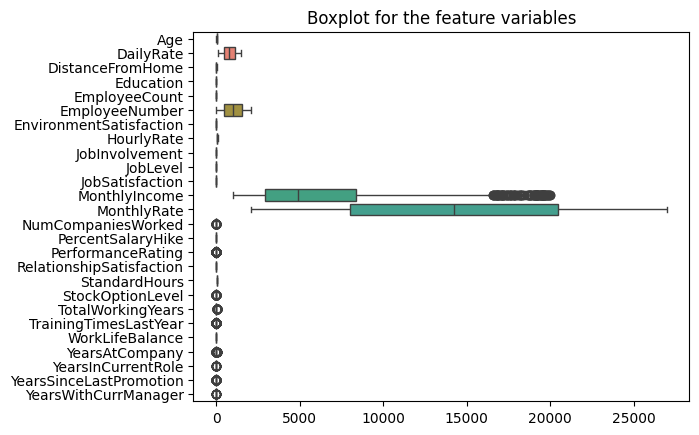

In [80]:

sns.boxplot(data=df, orient='h')
plt.title('Boxplot for the feature variables')
plt.show()

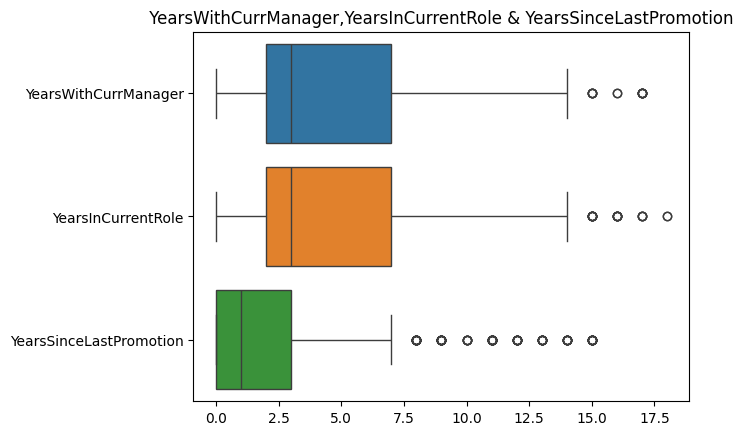

In [81]:
sns.boxplot(data=df[['YearsWithCurrManager','YearsInCurrentRole','YearsSinceLastPromotion']], orient='h')
plt.title(" YearsWithCurrManager,YearsInCurrentRole & YearsSinceLastPromotion ")
plt.show()

In [82]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

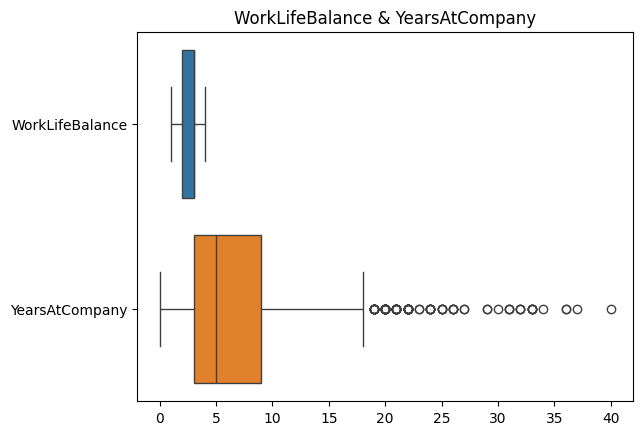

In [83]:
sns.boxplot(data=df[[ 'WorkLifeBalance', 'YearsAtCompany']], orient='h')
plt.title("WorkLifeBalance & YearsAtCompany")
plt.show()

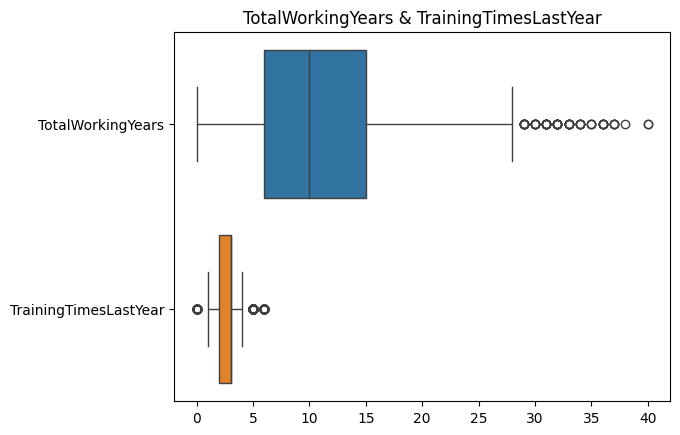

In [84]:
sns.boxplot(data=df[['TotalWorkingYears', 'TrainingTimesLastYear']], orient='h')
plt.title("TotalWorkingYears & TrainingTimesLastYear")
plt.show()

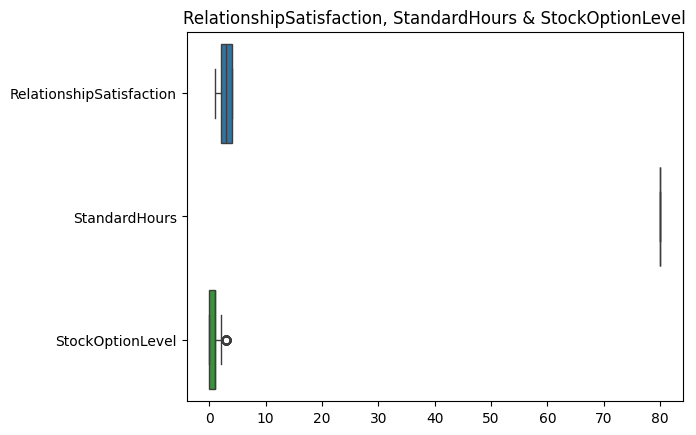

In [85]:
sns.boxplot(data=df[['RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel']], orient='h')
plt.title("RelationshipSatisfaction, StandardHours & StockOptionLevel")
plt.show()

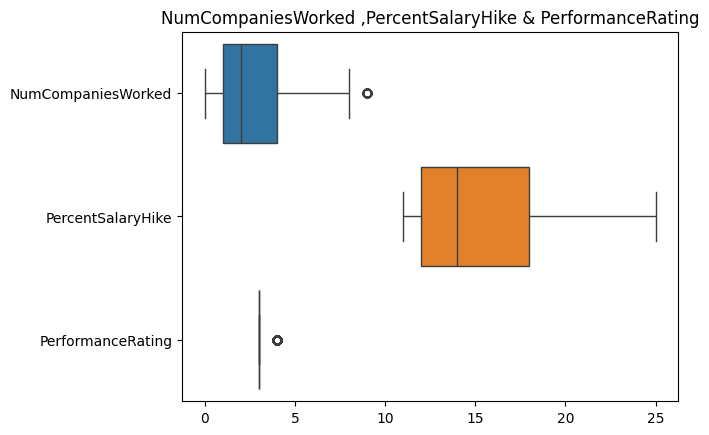

In [86]:
sns.boxplot(data=df[['NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating']], orient='h')
plt.title("NumCompaniesWorked ,PercentSalaryHike & PerformanceRating")
plt.show()

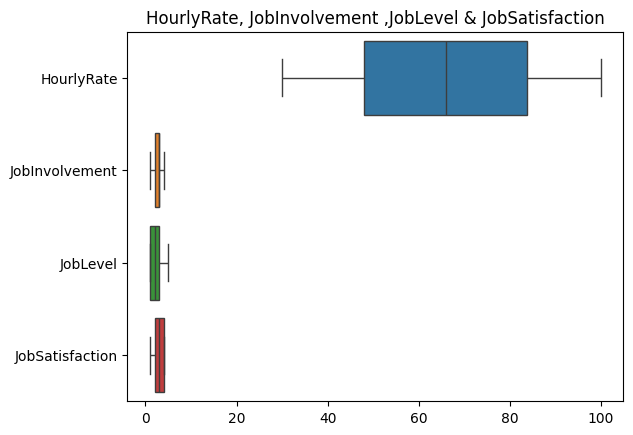

In [87]:
sns.boxplot(data=df[['HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction']],orient='h')
plt.title("HourlyRate, JobInvolvement ,JobLevel & JobSatisfaction")
plt.show()

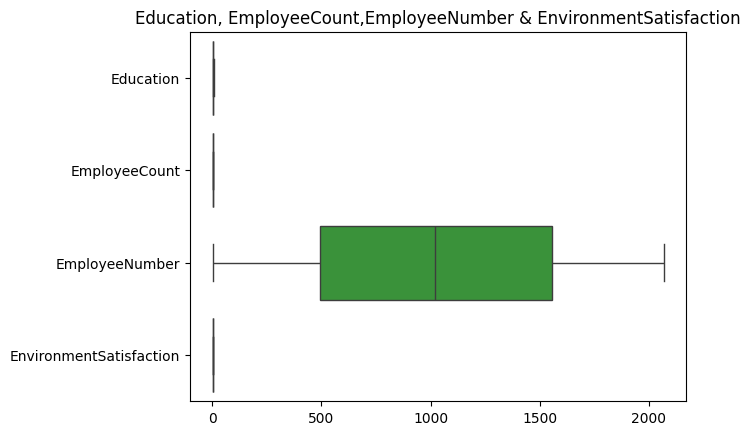

In [88]:
sns.boxplot(data=df[['Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction']], orient='h')
plt.title("Education, EmployeeCount,EmployeeNumber & EnvironmentSatisfaction")
plt.show()

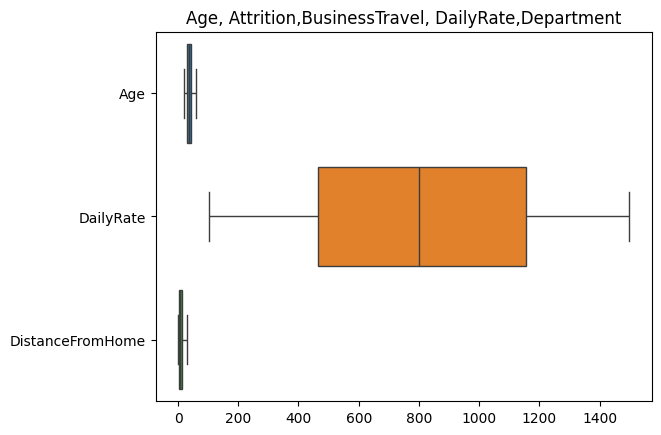

In [89]:
sns.boxplot(data=df[['Age', 'DailyRate','DistanceFromHome']], orient='h')
plt.title("Age, Attrition,BusinessTravel, DailyRate,Department")
plt.show()

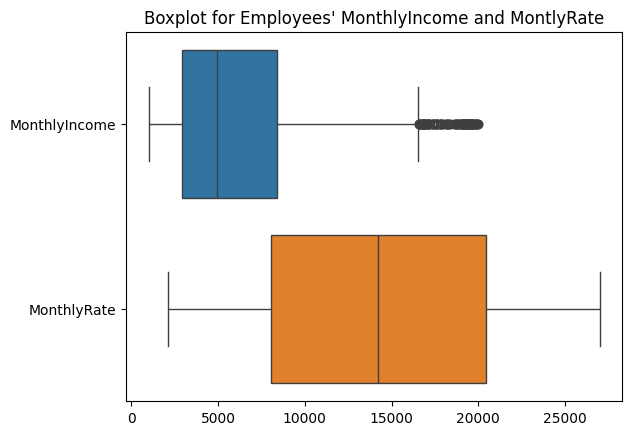

In [90]:
sns.boxplot(data = df[['MonthlyIncome','MonthlyRate']], orient='h')
plt.title("Boxplot for Employees' MonthlyIncome and MontlyRate")
plt.show()

###### Key insight
###### There are outliers present in several variables within the dataset, as indicated by the boxplot. These outliers need to be addressed to ensure data consistency and integrity.

#### Univariate Analysis

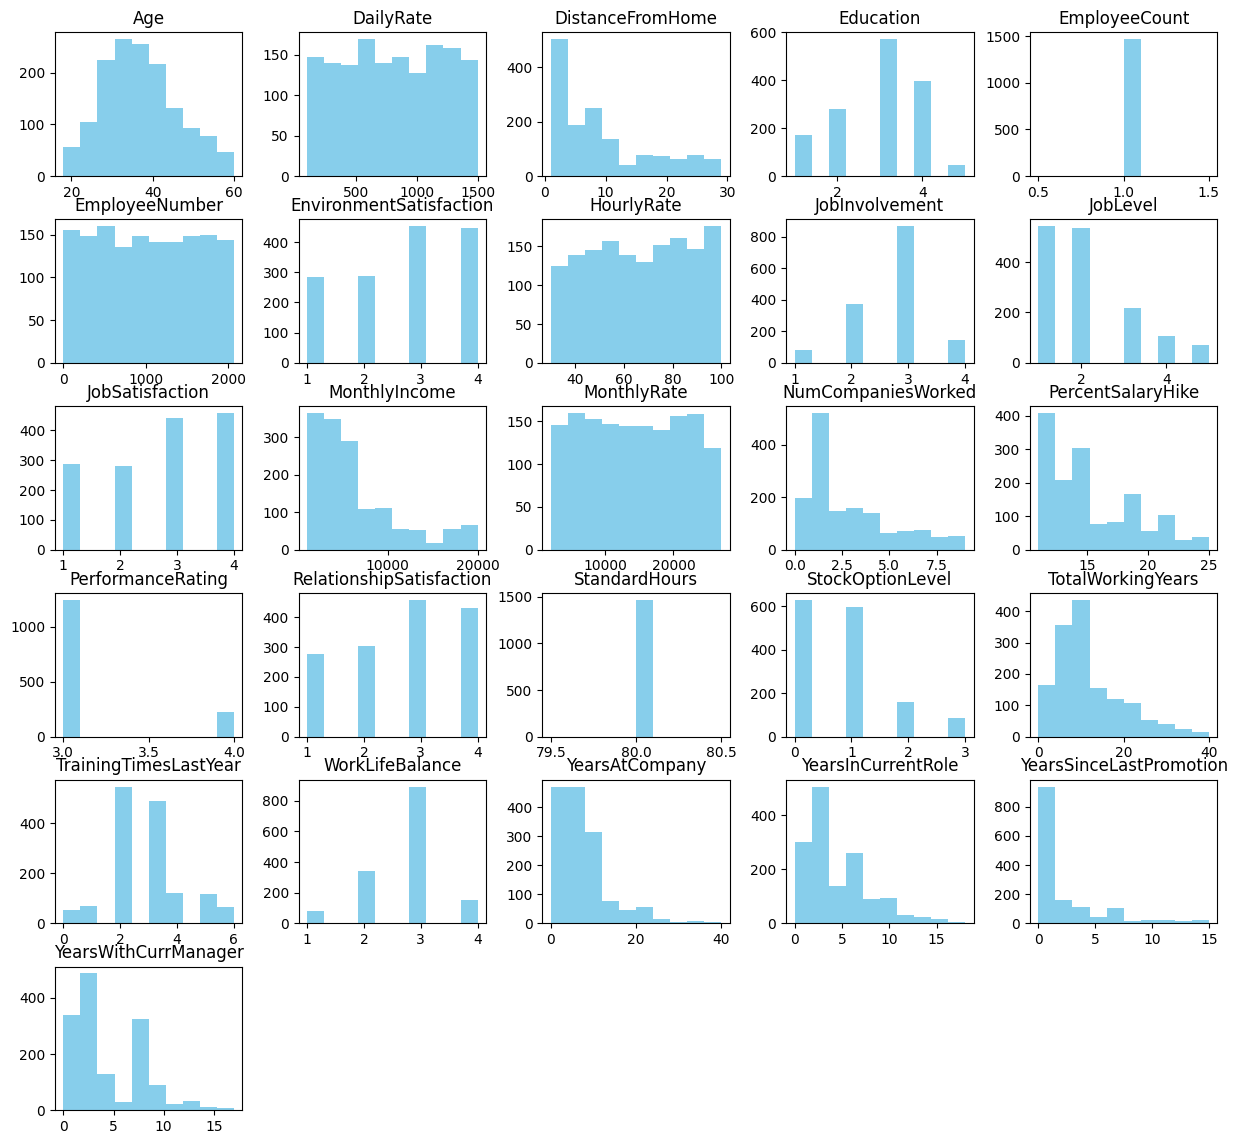

In [91]:
df.hist(grid=False,figsize=(15,14), color='skyblue')
plt.show()

###### Key insight
###### Age is the only variable that appears to follow a normal distribution, characterized by a bell-shaped curve, while the other variables exhibit skewness

#### Bivariate Analysis

In [92]:
var_cor = df.corr(numeric_only=True)
var_cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


###### Key insight
###### There is no strong correlation between any of the variables

#### Bivariate Analysis
#### Examining the impact of three independent variables on the dependent variable (target)

<Figure size 800x700 with 0 Axes>

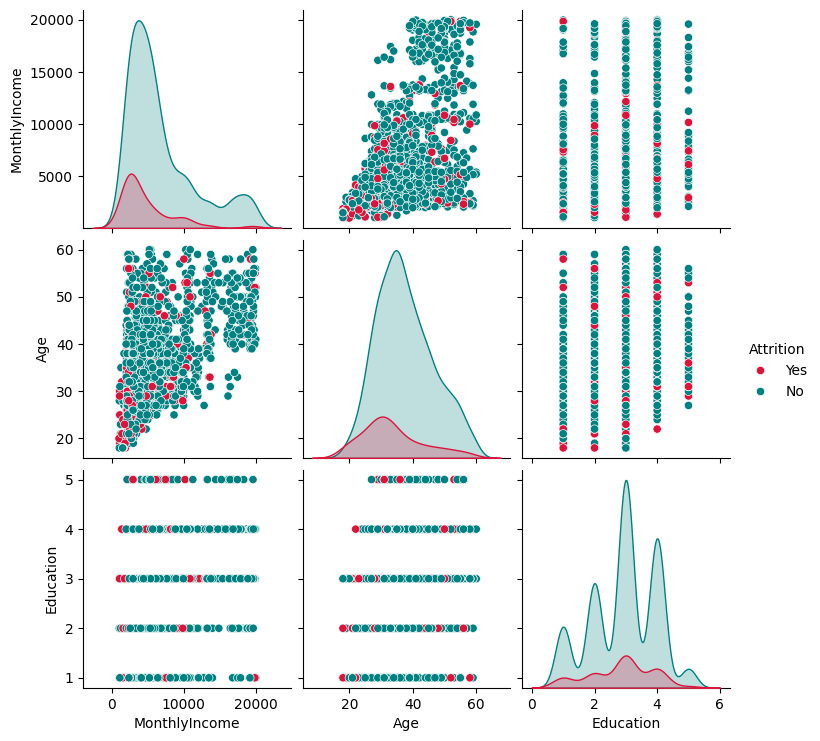

In [93]:
data = df[['Attrition','MonthlyIncome','Age','Education']]

# Define a colour palete for the Atrrition categories
color_palette = {'Yes':'Crimson','No':'Teal'}
plt.figure(figsize=(8,7))
sns.pairplot(data=data, hue='Attrition',palette=color_palette)
plt.show()

###### Key insights
###### The multivariate analysis indicates that employees with higher Monthly incomes are less likely to leave the company. Additionally, older employees tend to exhibit lower turnover rates, whereas younger employees are more inclined to leave. Furthermore, employees with higher education levels also demonstrate a tendency to stay with the company. However, further analysis may be required to fully understand the underlying reasons for this trend.

#### Hypothesis Testing

Hypothesis
Analyzing the Hypothetical Effect of Monthly Income on Employee Attrition and Turnover

 Null Hypothesis : Monthly income has no significant effect on employee attrition.
 
 Alternative Hypothesis : Monthly income has a significant effect on employee attrition.

In [94]:
# Create variables to filter the attrition group by montlyincome
yes_attrition = df[df['Attrition'] == 'Yes']['MonthlyIncome']
no_attrition = df[df['Attrition'] == 'No']['MonthlyIncome']

# Performing the t_test
t_statistic, p_value = ttest_ind(yes_attrition, no_attrition, equal_var=False)
print(f"T-statistic:{t_statistic}")
print(f"P-value:{p_value}")

# Set the significance level, alpha
alpha= 0.05
p_value = 4.4

if p_value < alpha:
    print("The difference is statistically significant. Reject the Null hypothesis")
else:
    print("The difference is not statistically significant. Fail to reject the Null hypotheis")


T-statistic:-7.482621586644742
P-value:4.433588628286071e-13
The difference is not statistically significant. Fail to reject the Null hypotheis


#### Multivariate Analysis

##### Using Principal Component Analysis to visualize the variables relationship in 3 dimension

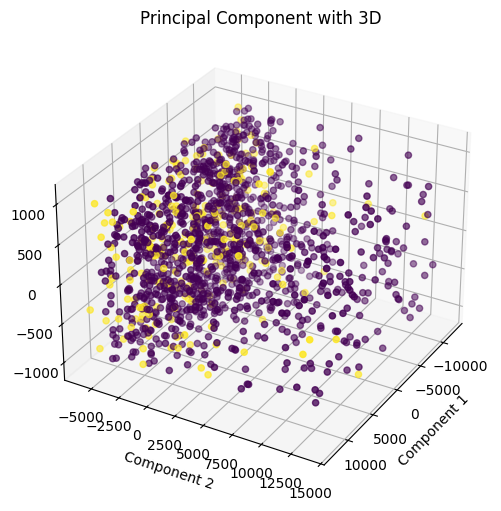

In [95]:
# Transform the target variable(Attrition) to colour the 3D pca

label = LabelEncoder()
target_label = label.fit_transform(df['Attrition'])

# Select the numerical features for the pca
pca_num = df.select_dtypes(include='number')

# Create an instance of the pca
pca = PCA(n_components=3)
pca_comp = pca.fit_transform(pca_num)

# Create the 3d plot
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(pca_comp[:,0], pca_comp[:,1], pca_comp[:,2], c=target_label)

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3", labelpad=30)
ax.view_init(elev=30, azim=30)
ax.set_title("Principal Component with 3D")
plt.show()


In [96]:
pca.explained_variance_

array([50710777.24147198, 22117357.41447721,   363038.69147662])

In [97]:
pca.components_

array([[ 5.31766734e-05, -1.81543064e-03,  3.07158089e-05,
        -3.37706971e-06,  3.38812789e-21,  1.04193586e-03,
         5.73793100e-06, -4.48275171e-05, -1.67053282e-06,
         1.01290834e-05,  6.85559839e-08,  4.08313789e-02,
         9.99163854e-01,  7.55263696e-06, -3.68016945e-06,
        -5.19997843e-07, -5.14477971e-07, -2.08421013e-22,
        -4.08390029e-06,  5.16476770e-05,  1.59326565e-07,
         8.71624279e-07, -8.37848069e-06, -1.51553856e-06,
         4.92333701e-06, -1.37329224e-05],
       [ 9.63953138e-04,  8.39357181e-04, -3.22781287e-05,
         2.10332199e-05,  1.04431275e-26, -2.03249348e-03,
        -1.99588341e-06, -6.42381041e-05, -2.15777732e-06,
         2.23154351e-04, -1.68467447e-06,  9.99162140e-01,
        -4.08277778e-02,  7.88625524e-05, -2.09131657e-05,
        -1.26689862e-06,  6.01213850e-06,  9.32671471e-22,
         1.36189643e-06,  1.27633343e-03, -5.98676429e-06,
         4.53559260e-06,  6.72029850e-04,  2.80966276e-04,
         2.36

#### Data Preparation

In [98]:
# Get x and y variables for the features and target variables
x = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition']

In [99]:
# split the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [100]:
# Select the numerical features from the independent variables
num_features = x.select_dtypes(include='number').columns
num_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [101]:
len(num_features)

26

In [102]:
# Select the categorical features
cat_features = x.select_dtypes(include='object').columns
cat_features

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype='object')

In [103]:
len(cat_features)

8

#### Numerical and Categorical Pipeline

In [104]:
# Create a function for the log transformation to handle zero values and lessen the impact of outliers
def log_transformer(x):
    return np.log1p(x)

logtransformer = FunctionTransformer(log_transformer)

In [105]:
# Create numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer',logtransformer), # To correct skewness of the data distribution
    ('robustscaler',RobustScaler()) #To handle outliers

])

# Create categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#### Preprocessor Pipeline for ColumnTransformer

In [106]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])

#### Encoding the Target variable

In [107]:
label_encoder = LabelEncoder()
y_train_encod = label_encoder.fit_transform(y_train)
y_test_encod = label_encoder.transform(y_test)

#### Model pipeline with imbalanced datasets

In [108]:
# Feature selection
feature_selection = SelectKBest(mutual_info_classif, k=15)

In [109]:
# Set dataframe for the classification  metrics
classification_scores = pd.DataFrame(columns= ['model_name', 'accuracy','precision','recall','f1_score'])

# Create a dictionary to store the  pipeline for the models
model_pipeline = {}

models = [
    ('decision_tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('randomforest_classifier', RandomForestClassifier(random_state=42)),
    ('kneigbor_classifier', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))

]

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',feature_selection),
        ('pca',pca),
        ('classifier', classifier),
    ])
    pipeline.fit(X_train,y_train_encod)

    # Predict using the X_test
    y_predict = pipeline.predict(X_test)

    classification_metrics = classification_report(y_predict, y_test_encod, output_dict=True)

    # Store each model pipeline in the dictionary
    model_pipeline[model_name] = pipeline

    accuracy = classification_metrics['accuracy'] 
    precision = classification_metrics['weighted avg']['precision']
    recall = classification_metrics['weighted avg']['recall']
    f1_score = classification_metrics['weighted avg']['f1-score']


    # Add the metrics to the classification_table
    classification_scores.loc[len(classification_scores)] = [ model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
classification_scores.sort_values('f1_score', ascending=True)


    

,model_name,accuracy,precision,recall,f1_score
0,decision_tree_classifier,0.714286,0.685933,0.714286,0.698288
2,kneigbor_classifier,0.823129,0.891857,0.823129,0.852521
4,gradient_boosting,0.816327,0.902554,0.816327,0.854117
1,randomforest_classifier,0.823129,0.899556,0.823129,0.855904
3,logistic_regression,0.829932,0.977774,0.829932,0.897807


###### Key insight
###### Logistic Regression is the best performing model with f1-score of 0.89

#### Balancing the Dataset Using RandomOversampler

In [110]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [111]:
# Create an instance for the randomoversampler
sampler = RandomOverSampler(random_state=42)
X_train_sampler,y_train_sampler = sampler.fit_resample(X_train,y_train_encod)

In [112]:
pd.DataFrame(y_train_sampler).value_counts() # To confirm if the datasets is balanced

0
0    986
1    986
Name: count, dtype: int64

#### Model Pipeline for Balanced Dataset

In [113]:
# Feature selection
feature_selection = SelectKBest(mutual_info_classif, k=15)

In [114]:
# Set dataframe for the classification  metrics
classification_scores = pd.DataFrame(columns= ['model_name', 'accuracy','precision','recall','f1_score'])

# Create a dictionary to store the  pipeline for the models
model_pipeline = {}

models = [
    ('decision_tree_classifier_balanced',DecisionTreeClassifier(random_state=42)),
    ('randomforest_classifier_balanced', RandomForestClassifier(random_state=42)),
    ('kneigbor_classifier_balanced', KNeighborsClassifier()),
    ('logistic_regression_balanced', LogisticRegression(random_state=42)),
    ('gradient_boosting_balanced', GradientBoostingClassifier(random_state=42))

]

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',feature_selection),
        ('pca',pca),
        ('classifier', classifier),
    ])
    pipeline.fit(X_train_sampler,y_train_sampler)

    # Predict using the X_test
    y_predict = pipeline.predict(X_test)

    classification_metrics = classification_report(y_predict, y_test_encod, output_dict=True)

    # Store each model pipeline in the dictionary
    model_pipeline[model_name] = pipeline

    accuracy = classification_metrics['accuracy'] 
    precision = classification_metrics['weighted avg']['precision']
    recall = classification_metrics['weighted avg']['recall']
    f1_score = classification_metrics['weighted avg']['f1-score']


    # Add the metrics to the classification_table
    classification_scores.loc[len(classification_scores)] = [ model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
classification_scores.sort_values('f1_score', ascending=True)


    

,model_name,accuracy,precision,recall,f1_score
2,kneigbor_classifier_balanced,0.568027,0.508132,0.568027,0.512456
3,logistic_regression_balanced,0.598639,0.619856,0.598639,0.545059
4,gradient_boosting_balanced,0.741497,0.713457,0.741497,0.718583
0,decision_tree_classifier_balanced,0.734694,0.722532,0.734694,0.728366
1,randomforest_classifier_balanced,0.785714,0.811230,0.785714,0.797580


###### Key Insight
###### Randomforest is the best perofrming model with fi_score of 0.8 with an accuracy of 0.79 which is the metric to be considered for balanced datasets

#### Selected Features by feature Selection

In [115]:
feature_indices = feature_selection.get_support(indices=True)
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
retrived_cat_features = preprocessor.named_transformers_['cat_pipeline'].get_feature_names_out(input_features= cat_features)
all_feature_names = numeric_features + list(retrived_cat_features)
selected_feature_names = [all_feature_names[i] for i in feature_indices]

In [116]:
# Diplay the selected features
pd.DataFrame(selected_feature_names)

,0
0,Age
1,DailyRate
2,EmployeeNumber
3,HourlyRate
4,JobLevel
5,JobSatisfaction
6,MonthlyIncome
7,MonthlyRate
8,StockOptionLevel
9,TotalWorkingYears


#### Classification Matrix

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [118]:
# Using the best performing model(Randomforest)
random_forest_pipeline_bal = model_pipeline['randomforest_classifier_balanced']

# Predict with randomforest pipeline
y_pred_rf = random_forest_pipeline_bal.predict(X_test)
confus_matx = confusion_matrix(y_pred_rf, y_test_encod)
confus_matx


array([[223,  38],
       [ 24,   9]])

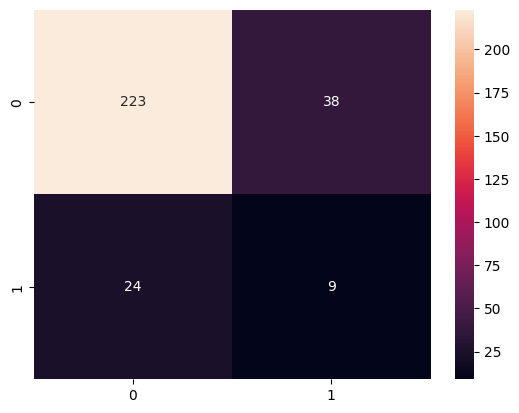

In [119]:
# Visualize the confusion matrix using heatmap
sns.heatmap(data=confus_matx, annot=True, fmt='d')
plt.show()

#### ROC AND AUC CURVE

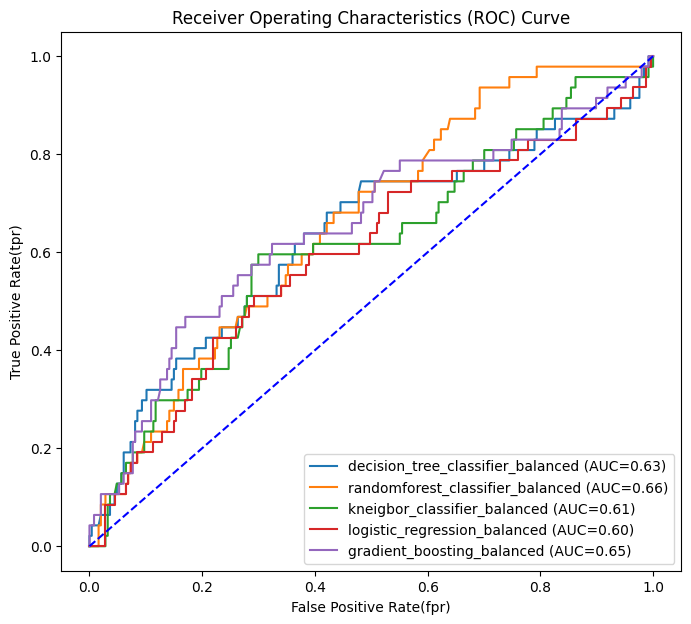

In [120]:
fig, axes = plt.subplots(figsize=(8,7))

# Create a dictionary to store the roc metrics
roc_score = {}

for model_name, classsifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selection),
        ('pca', pca),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train_sampler,y_train_sampler)
    y_pred_prob = pipeline.predict_proba(X_test)[:,1] #predict probability for the positive class

    fpr,tpr, threshold = roc_curve(y_test_encod, y_pred_prob)

    roc_auc = auc(fpr,tpr) # To generate area under curve

    roc_curve_metrics = pd.DataFrame({'false positive rate':fpr, 'true positive rate':tpr, 'threshold':threshold})

    roc_score[model_name] = roc_curve_metrics # Stores the roc_curve_metrics in  roc metrics dictionary using model name as the key

    axes.plot(fpr,tpr , label=f'{model_name} (AUC={roc_auc:.2f})')

axes.plot([0,1],[0,1], color='blue', linestyle='--')
axes.set_xlabel('False Positive Rate(fpr)')
axes.set_ylabel('True Positive Rate(tpr)')
axes.set_title('Receiver Operating Characteristics (ROC) Curve')
axes.legend(loc='lower right')
plt.legend(loc='lower right')
plt.show()


In [121]:
pd.set_option('display.max_rows',None)
print(roc_score['randomforest_classifier_balanced'])

     false positive rate  true positive rate  threshold
0               0.000000            0.000000        inf
1               0.004049            0.000000   0.963109
2               0.016194            0.000000   0.931071
3               0.016194            0.042553   0.918852
4               0.020243            0.042553   0.914943
5               0.020243            0.085106   0.893750
6               0.028340            0.085106   0.872850
7               0.028340            0.106383   0.861030
8               0.064777            0.106383   0.719311
9               0.064777            0.127660   0.712192
10              0.068826            0.127660   0.711321
11              0.068826            0.148936   0.709253
12              0.072874            0.148936   0.708397
13              0.072874            0.170213   0.701796
14              0.085020            0.170213   0.688530
15              0.085020            0.191489   0.682867
16              0.093117            0.191489   0

In [122]:
# Set threshold to 0.34 to improve the performance of the model
threshold = 0.16
y_pred_roc = random_forest_pipeline_bal.predict_proba(X_test)[:,1]
binary_pred = (y_pred_roc >= threshold )
threshold_confusion_matrix = confusion_matrix(y_test_encod, binary_pred)
threshold_confusion_matrix

array([[119, 128],
       [ 18,  29]])

<Axes: >

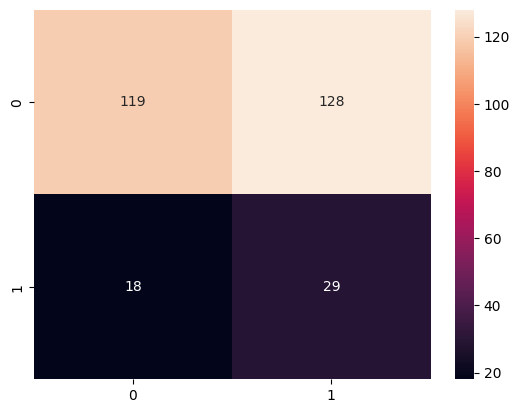

In [123]:
sns.heatmap(data=threshold_confusion_matrix,annot=True, fmt='d')

#### Hyperparameter Tuning with Random Forest

In [124]:
# Create an instance of the model to get the params
randomforest_classif = RandomForestClassifier(random_state=42)
randomforest_classif.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [125]:


# Define your parameter grid 
params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__bootstrap': [True, False], 
}

# Setup GridSearchCV with the pipeline and parameter grid
random_searcher = GridSearchCV(estimator=random_forest_pipeline_bal, param_grid=params,
                                scoring=('f1', 'accuracy', 'precision', 'recall', 'roc_auc'),
                                refit='accuracy', verbose=2, cv=3)

# Fit the search on the balanced datasets
random_searcher.fit(X_train_sampler, y_train_sampler)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=100; total time=   3.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=100; total time=   4.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=100; total time=   1.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=200; total time=   2.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=200; total time=   6.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__n_estimators=200; total time=   2.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__n_estimators=100; total time=   1.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__n_estimators=100; total time=   2.0s
[CV] END classifier__bootstrap=

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformer',
                                                                                          FunctionTransformer(func=<function log_transformer at 0x00000192FBAD53F0>)),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',...
                                                    score_func=<function mutual_info_classif at 0x00000192EBE1DAB0>)),
                                       ('pca', PCA(n_components=3)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__n_estimators': [100, 200]},
             refit='accuracy',
             scoring=('f1', 'accuracy', 'precision', 'recall', 'roc_auc'),
             verbose=2)

In [126]:
search_history = pd.DataFrame(random_searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__bootstrap,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,2.949669,0.839491,0.162329,0.059901,True,None,100,"{'classifier__bootstrap': True, 'classifier__m...",0.913616,0.953488,0.945402,0.937502,0.017210,8,0.910334,0.951294,0.942161,0.934596,0.017556,8,0.881356,0.911111,0.896458,0.896308,0.012148,8,0.948328,1.000000,1.000000,0.982776,0.024358,9,0.973245,0.997058,0.994431,0.988244,0.010660,7
1,3.658665,1.789601,0.170668,0.011897,True,None,200,"{'classifier__bootstrap': True, 'classifier__m...",0.909357,0.957664,0.949495,0.938839,0.021112,7,0.905775,0.955860,0.946728,0.936121,0.021779,7,0.876056,0.918768,0.903846,0.899557,0.017699,7,0.945289,1.000000,1.000000,0.981763,0.025791,12,0.967572,0.996933,0.994208,0.986238,0.013245,11
2,1.859668,0.151714,0.172332,0.049110,True,10,100,"{'classifier__bootstrap': True, 'classifier__m...",0.905882,0.900421,0.891089,0.899131,0.006108,14,0.902736,0.891933,0.882801,0.892490,0.008148,14,0.877493,0.833766,0.833333,0.848197,0.020716,15,0.936170,0.978659,0.957447,0.957425,0.017346,13,0.950037,0.977556,0.950423,0.959339,0.012882,13
3,2.128329,0.139107,0.161002,0.018457,True,10,200,"{'classifier__bootstrap': True, 'classifier__m...",0.893119,0.894356,0.912732,0.900069,0.008969,13,0.889058,0.888889,0.907154,0.895033,0.008571,13,0.861582,0.851240,0.862162,0.858328,0.005018,14,0.927052,0.942073,0.969605,0.946243,0.017621,14,0.941270,0.968725,0.965537,0.958510,0.012260,14
4,1.723001,0.070836,0.148999,0.020991,True,20,100,"{'classifier__bootstrap': True, 'classifier__m...",0.918129,0.941176,0.944046,0.934450,0.011600,12,0.914894,0.937595,0.940639,0.931043,0.011487,12,0.884507,0.888889,0.894022,0.889139,0.003888,11,0.954407,1.000000,1.000000,0.984802,0.021493,1,0.971684,0.997618,0.994621,0.987974,0.011584,8
5,2.422332,0.114031,0.187999,0.015515,True,20,200,"{'classifier__bootstrap': True, 'classifier__m...",0.912536,0.950725,0.946763,0.936675,0.017145,9,0.908815,0.948250,0.943683,0.933583,0.017613,9,0.876751,0.906077,0.898907,0.893912,0.012483,9,0.951368,1.000000,1.000000,0.983789,0.022925,5,0.970265,0.998629,0.995024,0.987973,0.012607,9
6,1.689669,0.046135,0.126000,0.001414,True,30,100,"{'classifier__bootstrap': True, 'classifier__m...",0.909621,0.946609,0.948127,0.934786,0.017805,10,0.905775,0.943683,0.945205,0.931555,0.018240,10,0.873950,0.898630,0.901370,0.891317,0.012331,10,0.948328,1.000000,1.000000,0.982776,0.024358,9,0.965314,0.997864,0.995506,0.986228,0.014820,12
7,2.204665,0.164807,0.165337,0.010272,True,30,200,"{'classifier__bootstrap': True, 'classifier__m...",0.914119,0.946609,0.942693,0.934474,0.014481,11,0.910334,0.943683,0.939117,0.931045,0.014763,11,0.877095,0.898630,0.891599,0.889108,0.008966,12,0.954407,1.000000,1.000000,0.984802,0.021493,1,0.971633,0.995163,0.994440,0.987078,0.010926,10
8,1.682335,0.015795,0.120000,0.012726,False,None,100,"{'classifier__bootstrap': False, 'classifier__...",0.924890,0.963289,0.953623,0.947267,0.016308,3,0.922492,0.961948,0.951294,0.945245,0.016666,3,0.897143,0.929178,0.911357,0.912560,0.013106,3,0.954407,1.000000,1.000000,0.984802,0.021493,1,0.980456,0.998480,0.996951,0.991962,0.008160,2
9,1.996335,0.068396,0.158998,0.002826,False,None,200,"{'classifier__bootstrap': False, 'classifier__...",0.935917,0.947977,0.959184,0.947692,0.009501,2,0.934650,0.945205,0.957382,0.945746,0.009288,2,0.918129,0.901099,0.921569,0.913599,0.

In [127]:
randomforest_best_params = random_searcher.best_params_
randomforest_best_params

{'classifier__bootstrap': False,
 'classifier__max_depth': 30,
 'classifier__n_estimators': 100}

In [128]:
tuned_randomforest = random_searcher.best_estimator_
tuned_randomforest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<function log_transformer at 0x00000192FBAD53F0>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'Environmen...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x00000192EBE1DAB0>)),
                ('pca', PCA(n_components=3)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        random_state=42))])

In [129]:
# Retrain model with best params
random_tuned_params = random_forest_pipeline_bal.set_params(**randomforest_best_params)
random_tuned_params.fit(X_train_sampler, y_train_sampler)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<function log_transformer at 0x00000192FBAD53F0>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'Environmen...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x00000192EBE1DAB0>)),
                ('pca', PCA(n_components=3)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        random_state=42))])

In [130]:
y_predict_tuned = random_tuned_params.predict(X_test)
tuned_class_report = classification_report(y_test_encod,y_predict_tuned)
print(tuned_class_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.38      0.21      0.27        47

    accuracy                           0.82       294
   macro avg       0.62      0.57      0.59       294
weighted avg       0.79      0.82      0.80       294



##### Model Persistence

In [131]:
# Create a model file to store 
os.makedirs('./model', exist_ok=True)
# Save the model
joblib.dump(random_tuned_params, './model/random_forest_model.joblib')

['./model/random_forest_model.joblib']


### Executive Summary

The primary objective of this project was to develop a robust machine learning model to accurately predict employee attrition and turnover at ACME Corporation.

Throughout the analysis, various predictor variables were examined in relation to the target variable, employee attrition. Preliminary findings suggested that the Monthly Income variable was statistically significant in predicting employee attrition, although further investigation was required to validate this conclusion.
The Random Forest model emerged as the best-performing model, achieving an accuracy of 0.78.  After hyperparameter tuning, the model's accuracy improved to 0.82 on balanced datasets. However, for the unbalanced datasets, the Logistic Regression model performed best, with an F1 score of 0.89 among the five trained algorithms. Despite the Random Forest model's high accuracy, the Receiver Operating Characteristic (ROC) AUC curve indicated that it excelled in classification tasks, with an AUC score of 0.66.  

In conclusion, the Random Forest model demonstrated strengths in handling noisy data and reducing overfitting through averaging. While it maintained high accuracy by correctly predicting the majority class and making finer distinctions between classes, this impacted the AUC-ROC score.By setting the threshold at 0.16, the model increased the True Positive Rate class. Additional efforts and analyses are recommended to further refine the models and enhance their predictive performance.



